# Q-Learning with OpenAI Taxi-v2 
<br> 
In this Notebook, we'll implement an agent <b>that plays OpenAI Taxi-V2.</b>

The goal of this game is that our agent must <b>pick up the passenger at one location and drop him off to the goal as fast as possible.</b>

There are 4 locations (labeled by different letters) and your job is to pick up the passenger at one location and drop him off in another. 

- You receive +20 points for a successful dropoff
- Lose 1 point for every timestep it takes. 
- There is also a 10 point penalty for illegal pick-up and drop-off actions (if you don't drop the passenger in one of the 3 other locations)
- There are 500 state, 25 location * 5 place where the passenger could be (Four special location and being in the taxi) * 4 destination

## Prerequisites 
Before diving on the notebook **you need to understand**:
- The foundations of Reinforcement learning (MC, TD, Rewards hypothesis...) [Article](https://medium.freecodecamp.org/an-introduction-to-reinforcement-learning-4339519de419)
- Q-learning [Article](https://medium.freecodecamp.org/diving-deeper-into-reinforcement-learning-with-q-learning-c18d0db58efe)
- You can follow this notebook using my [video tutorial](https://www.youtube.com/watch?v=q2ZOEFAaaI0) 

## Step 0: Import the dependencies 
First, we need to import the libraries <b>that we'll need to create our agent.</b></br>
We use 3 libraries:
- `Numpy` for our Qtable
- `OpenAI Gym` for our Taxi Environment
- `Random` to generate random numbers

In [133]:
import numpy as np
import gym
import random

## Step 1: Create the environment 
- Here we'll create the Taxi environment. 
- OpenAI Gym is a library <b> composed of many environments that we can use to train our agents.</b>

In [134]:
env = gym.make("Taxi-v2")
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


## Step 2: Create the Q-table and initialize it 
- Now, we'll create our Q-table, to know how much rows (states) and columns (actions) we need, we need to calculate the action_size and the state_size
- OpenAI Gym provides us a way to do that: `env.action_space.n` and `env.observation_space.n`

In [135]:
action_size = env.action_space.n
print("Action size ", action_size)

state_size = env.observation_space.n
print("State size ", state_size)

Action size  6
State size  500


In [136]:
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


## Step 3: Create the hyperparameters 
Here, we'll specify the hyperparameters.

In [137]:
total_episodes = 5000        # Total episodes the orig_value = 50000
total_test_episodes = 100     # Total test episodes
max_steps = 99                # Max steps per episode

learning_rate = 0.7           # Learning rate
gamma = 0.618                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.01             # Exponential decay rate for exploration prob

## Step 4: The Q-learning algorithm 
- Now we implement the Q learning algorithm:
<img src="qtable_algo.png" alt="Q algo"/>

In [138]:
rewards = []
for epi in range(total_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    for step in range(max_steps):
        rand_or_not = random.uniform(0, 1)
        if rand_or_not > epsilon:
            action = np.argmax(qtable[state, :])
        else:
            action = env.action_space.sample()
            
        next_state, reward, done, info = env.step(action)
        
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[next_state, :]) - qtable[state, action])
        total_rewards += reward
        state = next_state
        if done == True:
            break
    rewards.append(total_rewards)
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*epi)
        

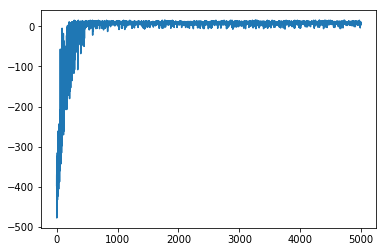

In [139]:
import matplotlib.pyplot as plt
plt.plot(rewards)
plt.show()

In [140]:
rewards[-4]

6

## Step 5: Use our Q-table to play Taxi 
- After 50 000 episodes, our Q-table can be used as a "cheatsheet" to play Taxi.
- By running this cell you can see our agent playing Taxi.

In [141]:
env.reset()
rewards = []

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
#     print("****************************************************")
#     print("EPISODE ", episode)

    for step in range(max_steps):
        #env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])
        #action = env.action_space.sample() # To check the result of a random agent
        new_state, reward, done, info = env.step(action)
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
#env.close()
print ("Score over time: " +  str(sum(rewards)/total_test_episodes))

Score over time: 8.39


In [142]:
# play one episode with visualiztion
import time
state = env.reset()
step = 0
done = False
total_rewards = 0
for step in range(max_steps):
        env.render()
        time.sleep(2)
        action = np.argmax(qtable[state,:])
        #action = env.action_space.sample() # To check the result of a random agent
        next_state, reward, done, info = env.step(action)
        state = next_state
        total_rewards += reward
        
        if done:
            break
            
print(total_rewards)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | :_:G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
13
